In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
train_data = pd.read_csv('/home/hariom/Downloads/SpamSMS/spam.csv', encoding='ISO-8859-1')

In [3]:

train_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
train_data.shape

(5572, 5)

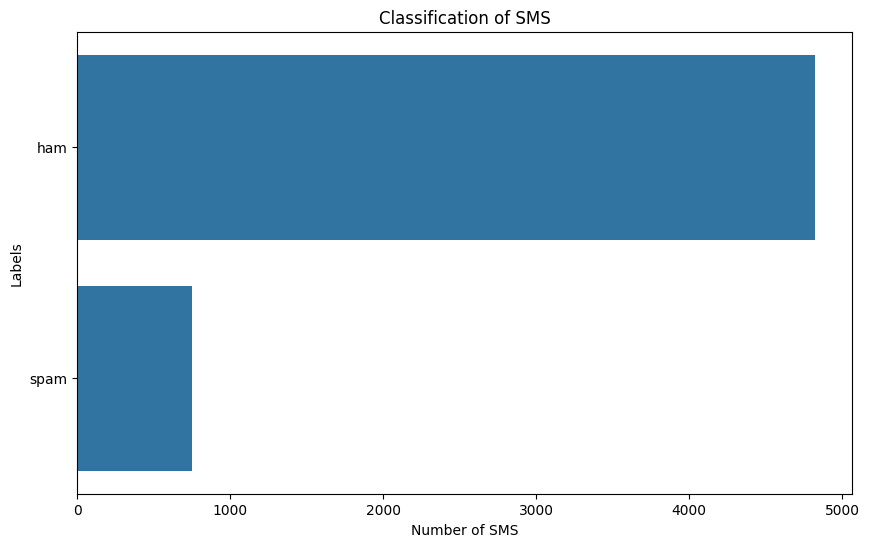

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, y='v1', order=train_data['v1'].value_counts().index)
plt.title('Classification of SMS')
plt.xlabel('Number of SMS')
plt.ylabel('Labels')
plt.show()

In [6]:
train_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
train_data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(train_data['v1'])

In [9]:
train_data['v1'] = labels
train_data['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [10]:
legit = train_data[train_data.v1==0]
fraud = train_data[train_data.v1==1]
print(legit.shape)
print(fraud.shape)

(4825, 5)
(747, 5)


In [11]:
legit_sample = legit.sample(n=1000)
print(legit_sample.shape)

(1000, 5)


In [12]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)
new_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3775,0,Ok lor. Msg me b4 u call.,NaN,NaN,NaN
160,0,Keep yourself safe for me because I need you a...,NaN,NaN,NaN
3231,0,Guess he wants alone time. We could just show ...,NaN,NaN,NaN
2448,0,Do u knw dis no. &lt;#&gt; ?,NaN,NaN,NaN
5353,0,Guai... ÌÏ shd haf seen him when he's naughty....,NaN,NaN,NaN


In [13]:
new_dataset.shape

(1747, 5)

In [14]:
X = new_dataset['v2']
Y = new_dataset['v1']
print(X)

3775                            Ok lor. Msg me b4 u call.
160     Keep yourself safe for me because I need you a...
3231    Guess he wants alone time. We could just show ...
2448                         Do u knw dis no. &lt;#&gt; ?
5353    Guai... ÌÏ shd haf seen him when he's naughty....
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: v2, Length: 1747, dtype: object


In [15]:
print(Y)

3775    0
160     0
3231    0
2448    0
5353    0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: v1, Length: 1747, dtype: int64


In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28158 stored elements and shape (1747, 4907)>
  Coords	Values
  (0, 1006)	0.5628028804193449
  (0, 1241)	0.22844714997649615
  (0, 2762)	0.48255993319307505
  (0, 2886)	0.30387419628815987
  (0, 3021)	0.3939968516201598
  (0, 3208)	0.3881078227498469
  (1, 866)	0.23687294406709106
  (1, 885)	0.24884989905210428
  (1, 1059)	0.27699546694723925
  (1, 1814)	0.33021521711638313
  (1, 1841)	0.30076900844998833
  (1, 2018)	0.12136041032479555
  (1, 2424)	0.12976442361526538
  (1, 2579)	0.23032433042259323
  (1, 2697)	0.23687294406709106
  (1, 2886)	0.14379371767381954
  (1, 2944)	0.2264596765093582
  (1, 3094)	0.2040263691603342
  (1, 3616)	0.23032433042259323
  (1, 3778)	0.30076900844998833
  (1, 3844)	0.1864398910413523
  (1, 4315)	0.15255378444048548
  (1, 4876)	0.2809841013230879
  (1, 4882)	0.26631915273348583
  (2, 864)	0.3173518521266719
  :	:
  (1746, 163)	0.29820225758891605
  (1746, 305)	0.20287264087927284
  (1746, 428)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1397, 4907) (350, 4907) (1397,) (350,)


In [19]:
model_2 = RandomForestClassifier()
model_2.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
Y_train_pred = model_2.predict(X_train)
Y_test_pred = model_2.predict(X_test)

In [21]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

In [22]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.97


In [23]:
def predict_spam(user_input):
    user_input_tfidf = vectorizer.transform([user_input])
    final_prediction = model_2.predict(user_input_tfidf)
    return final_prediction

In [24]:
user_input = input("Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. �1.50 SP:Tyrone,,,")
sms_category = predict_spam(user_input)
print(sms_category)
    

[0]


In [25]:
if(sms_category == 0):
  print("The SMS is not Spam")
else:
    print("The SMS is Spam")

The SMS is not Spam
